# Explore here

In [91]:
import pandas as pd

data_bank = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep= ';')
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [92]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [93]:
#month, day_of_week, pdays, education fuera
if data_bank.duplicated().sum():
    data_bank = data_bank.drop_duplicates()
print(data_bank.shape)
data_bank.head(10)

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [94]:
filt_data = data_bank.drop(['contact', 'month', 'day_of_week'], axis=1)
filt_data.info()
#numerica: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
#categorica: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, 

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   duration        41176 non-null  int64  
 8   campaign        41176 non-null  int64  
 9   pdays           41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null  obje

In [95]:
if filt_data.duplicated().sum():
    filt_data = filt_data.drop_duplicates()
print(filt_data.shape)
filt_data.head()

(41175, 18)


,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


puedo relacionar:
age con housing
education con housing
marital con loan 


dt_nio['room.n'] = pd.factorize(dt_nio["room_type"])[0]

fig, axis = plt.subplots(2, 1)

sns.regplot(data = dt_nio, x = "room.n", y = "price", ax = axis[0])
sns.heatmap(dt_nio[["price", "room.n"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_568/3139331093.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


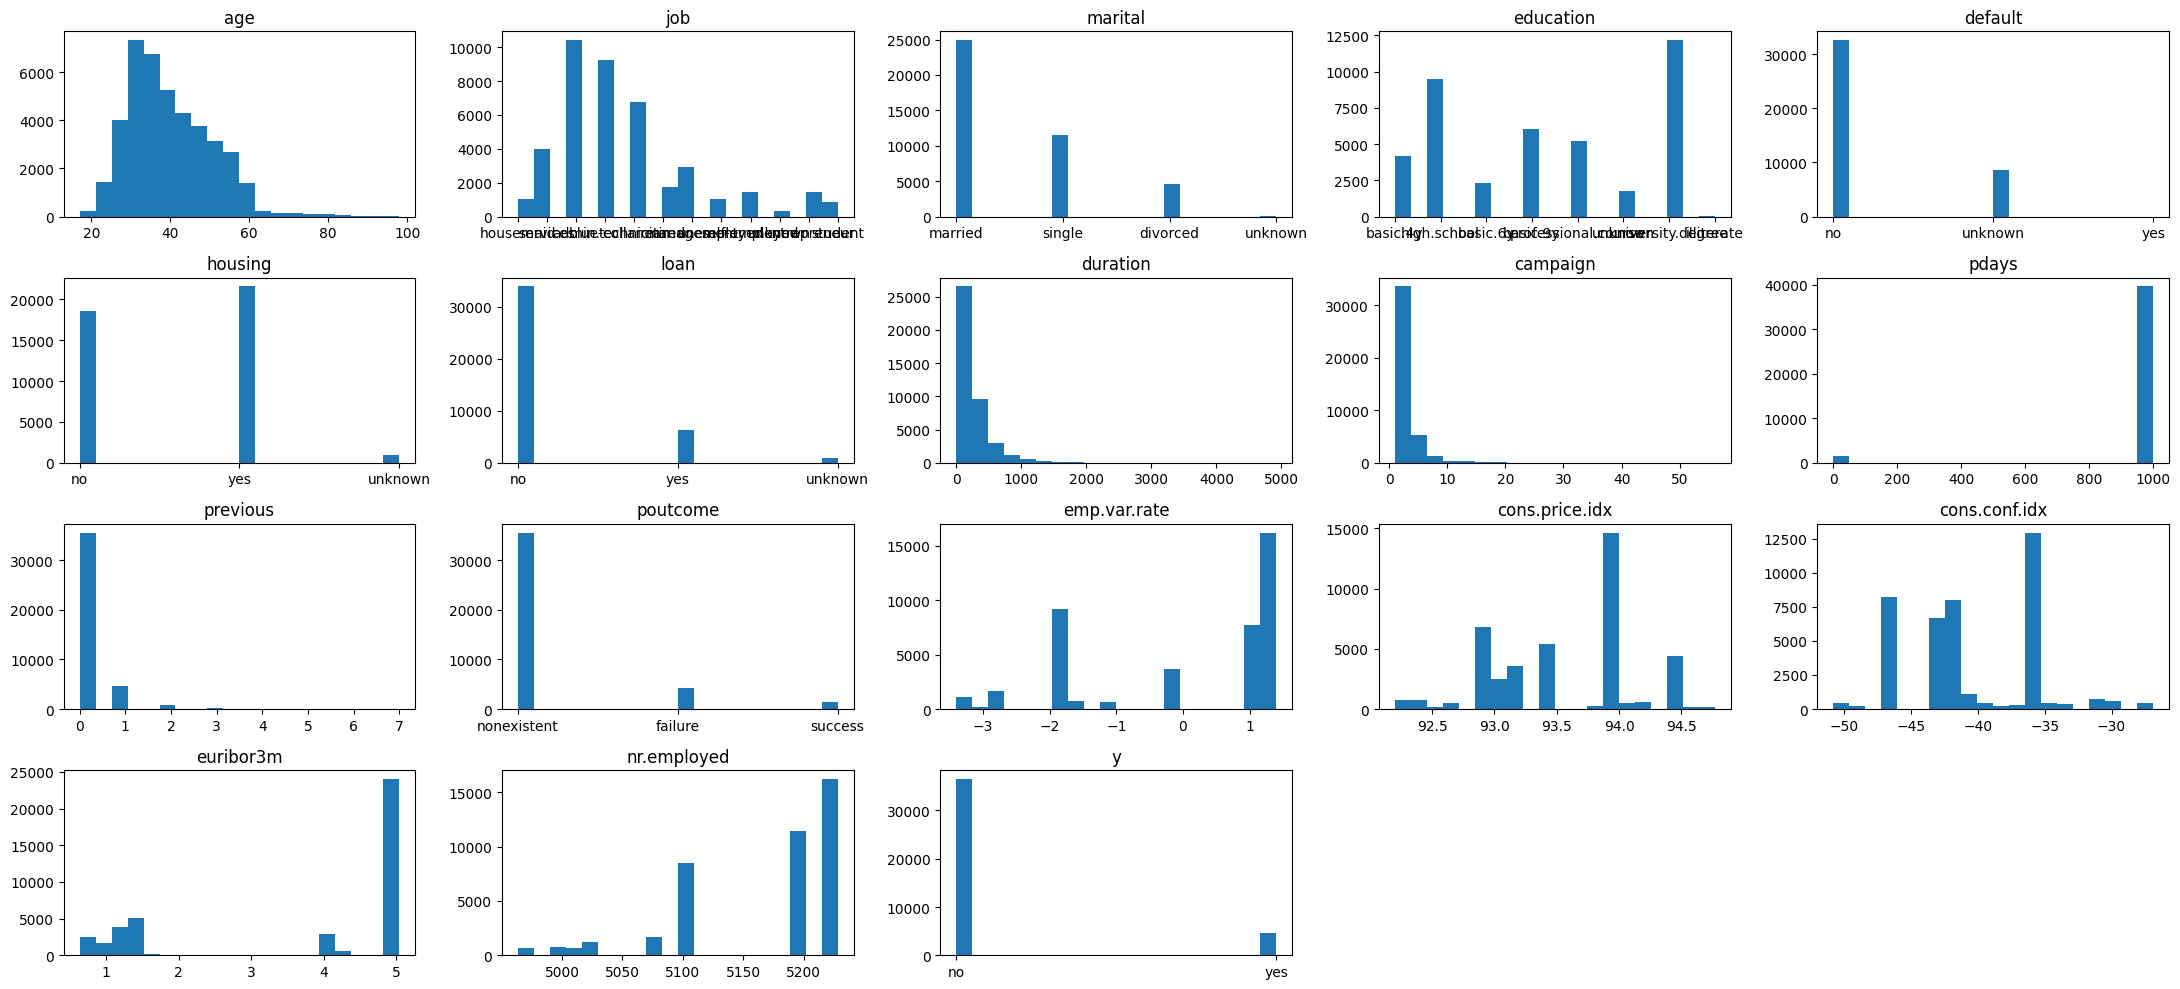

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

#numerica: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
#categorica: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, 

nrows = 4
ncols = 5

fig, axis = plt.subplots(ncols = ncols, nrows = nrows, figsize = (22, 10), constrained_layout = True)

for n, col in enumerate(filt_data.columns):
    row = n // ncols
    col_id = n % ncols
    axis[row, col_id].hist(filt_data[col], bins= 20)
    axis[row, col_id].set_title(col)
    
    
plt.tight_layout()
fig.delaxes(axis[3, 3])
fig.delaxes(axis[3, 4])
plt.show()


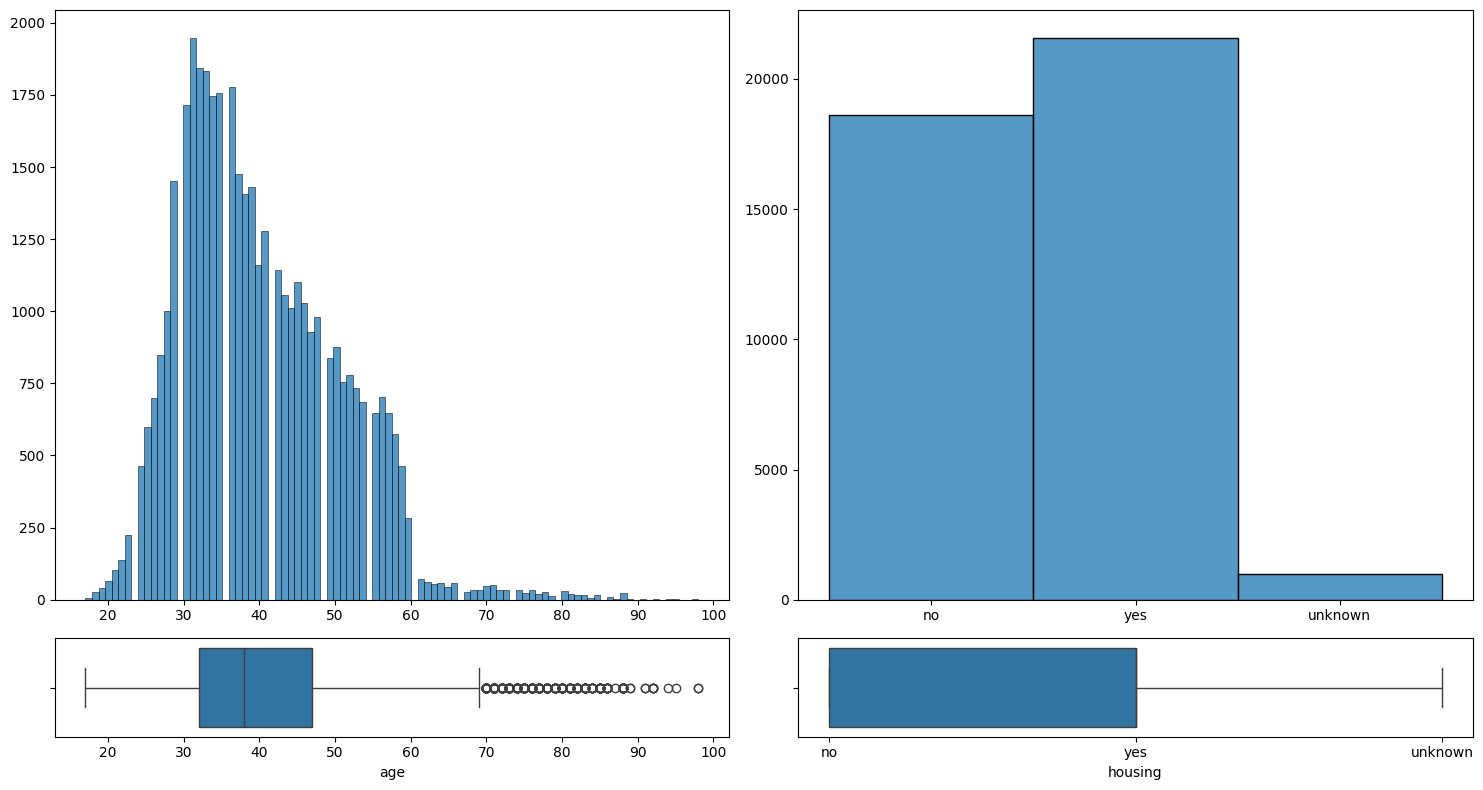

In [101]:
fig, axis = plt.subplots(2, 2, figsize= (15, 8),gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax= axis [0, 0], data = filt_data, x= 'age').set(xlabel = None, ylabel = None)
sns.boxplot(ax= axis [1, 0], data = filt_data, x= 'age')
sns.histplot(ax = axis [0, 1], data = filt_data, x = 'housing').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis [1, 1], data= filt_data, x = 'housing')

plt.tight_layout()
plt.show()

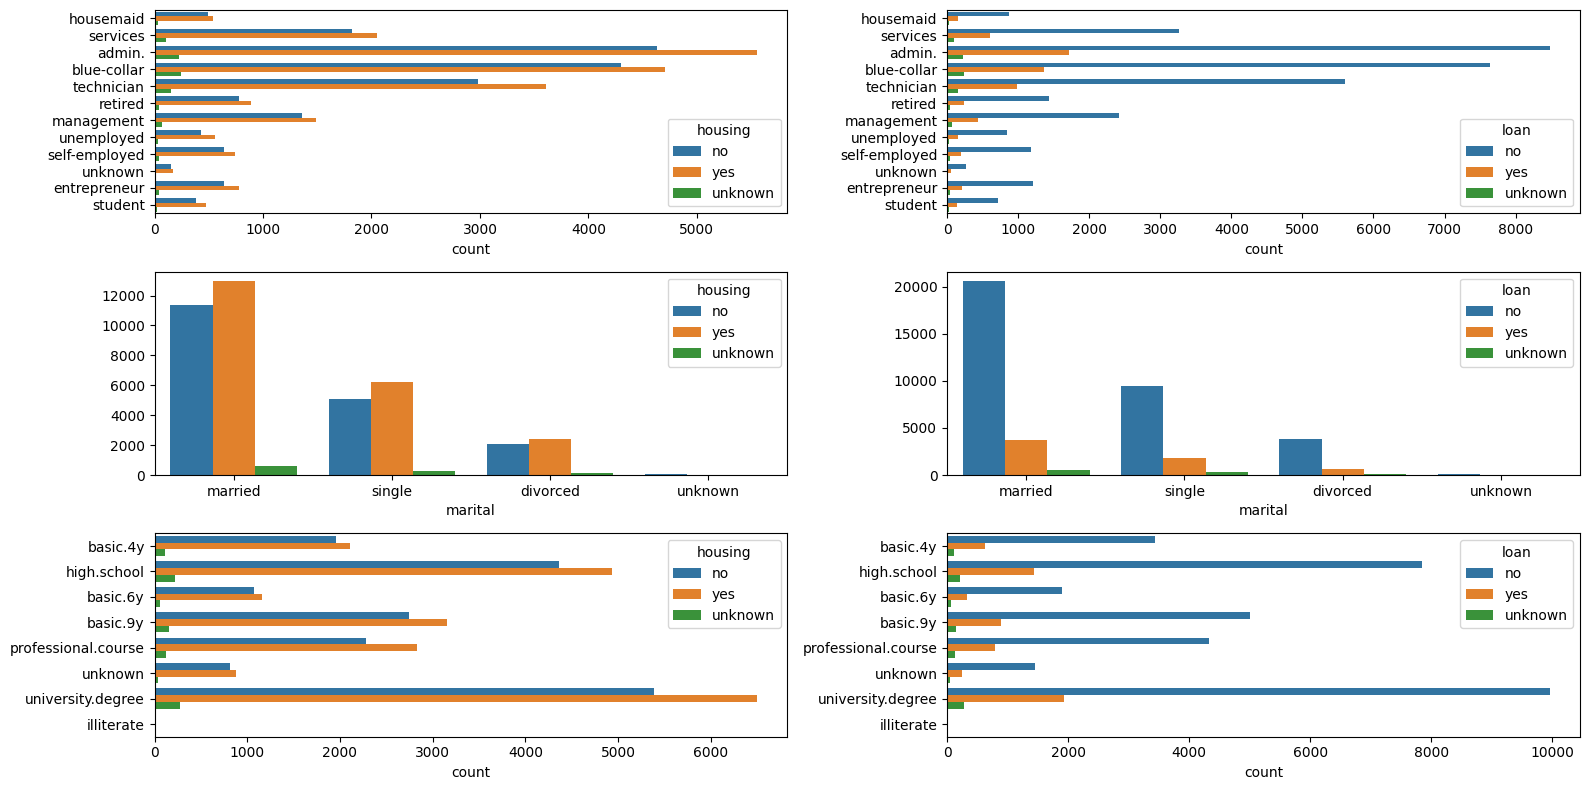

In [102]:
fig, axis = plt.subplots(3, 2, figsize= (16, 8))

sns.countplot(ax = axis [0, 0], data = filt_data, y = 'job', hue = 'housing').set(ylabel = None)
sns.countplot(ax = axis [0, 1], data = filt_data, y = 'job', hue = 'loan').set(ylabel = None)
sns.countplot(ax = axis [1, 0], data = filt_data, x = 'marital', hue = 'housing').set(ylabel = None)
sns.countplot(ax = axis [1, 1], data = filt_data, x = 'marital', hue = 'loan').set(ylabel = None)
sns.countplot(ax = axis [2, 0], data = filt_data, y = 'education', hue = 'housing').set(ylabel = None)
sns.countplot(ax = axis [2, 1], data = filt_data, y = 'education', hue = 'loan').set(ylabel = None)
plt.tight_layout()
plt.show()

In [103]:
filt_data['job_num'] = pd.factorize(filt_data['job'])[0]
filt_data['marital_num'] = pd.factorize(filt_data['marital'])[0]
filt_data['education_num'] = pd.factorize(filt_data['education'])[0]
filt_data['default_num'] = pd.factorize(filt_data['default'])[0]
filt_data['housing_num'] = pd.factorize(filt_data['housing'])[0]
filt_data['loan_num'] = pd.factorize(filt_data['loan'])[0]
filt_data['poutcome_num'] = pd.factorize(filt_data['poutcome'])[0]
filt_data['y_num'] = pd.factorize(filt_data['y'])[0]

filt_data.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,...,nr.employed,y,job_num,marital_num,education_num,default_num,housing_num,loan_num,poutcome_num,y_num
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,...,5191.0,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,149,1,999,...,5191.0,no,1,0,1,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,226,1,999,...,5191.0,no,1,0,1,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,999,...,5191.0,no,2,0,2,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,999,...,5191.0,no,1,0,1,0,0,1,0,0


[Text(518.3088699494949, 0.5, '')]

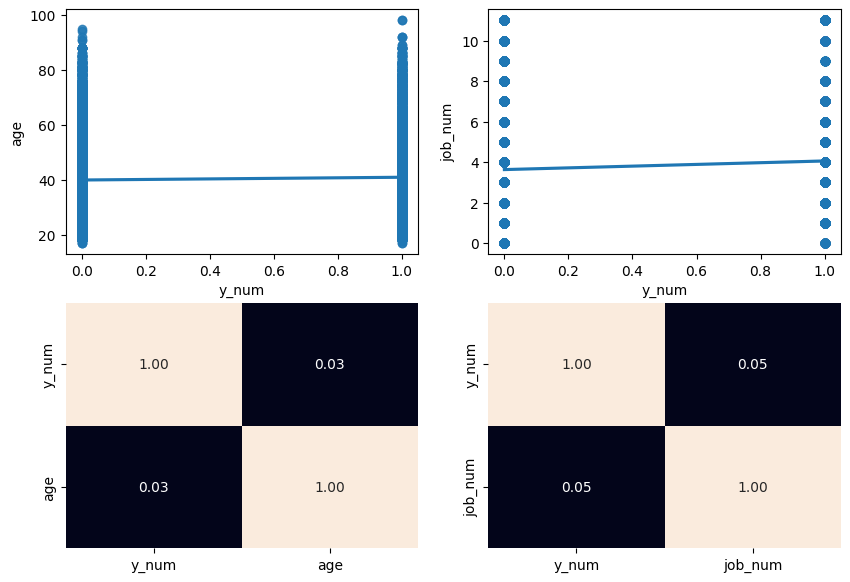

In [104]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis [0, 0], data = filt_data, x = 'y_num', y = 'age')
sns.regplot(ax = axis [0, 1], data= filt_data, x = 'y_num', y = 'job_num')
sns.heatmap(filt_data[['y_num', 'age']].corr(), annot= True, fmt= '.2f', ax= axis [1, 0], cbar= False).set(ylabel = None)
sns.heatmap(filt_data[['y_num', 'job_num']].corr(), annot= True, fmt= '.2f', ax= axis [1, 1], cbar= False).set(ylabel = None)

**Parece que no hay correlacion de ningun tipo**

[Text(33.081597222222214, 0.5, '')]

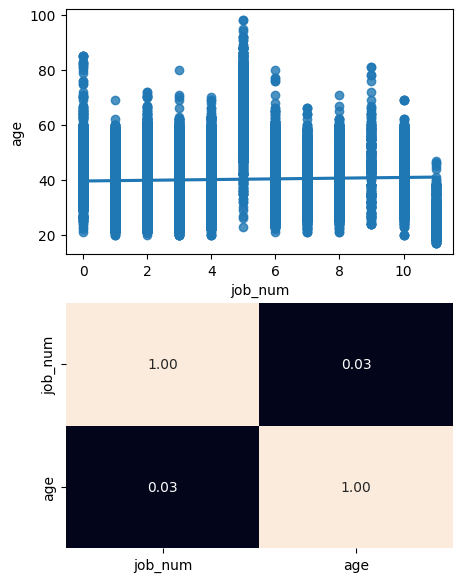

In [105]:
fig, axis = plt.subplots (2, 1, figsize = (5, 7))

sns.regplot(ax = axis [0], data = filt_data, x = 'job_num', y = 'age')
sns.heatmap(filt_data[['job_num', 'age']].corr(), annot= True, fmt = '.2f', ax= axis [1], cbar= False).set(ylabel = None)

<Axes: xlabel='marital_num', ylabel='count'>

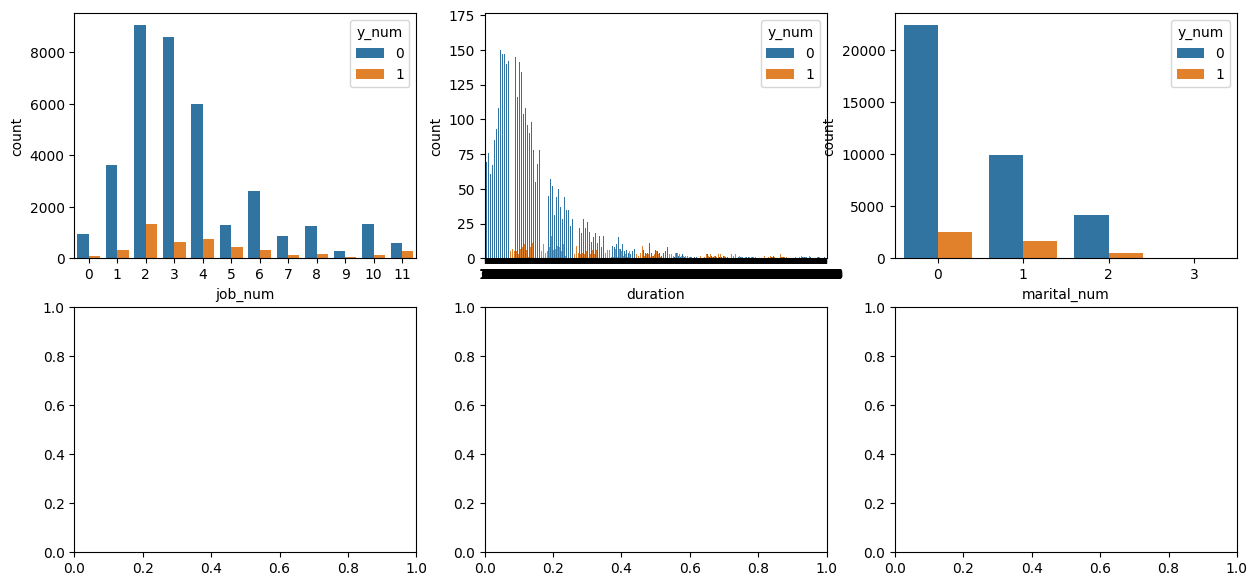

In [109]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = filt_data, x= 'job_num', hue= 'y_num')
sns.countplot(ax = axis [0, 1], data = filt_data, x = 'duration', hue = 'y_num')
sns.countplot(ax = axis [0, 2], data = filt_data, x = 'marital_num', hue= 'y_num')

# sns.countplot(ax = axis[0, 0], data = total_data, x = "Sex", hue = "Survived")
# sns.countplot(ax = axis[0, 1], data = total_data, x = "Pclass", hue = "Survived").set(ylabel = None)
# sns.countplot(ax = axis[0, 2], data = total_data, x = "Embarked", hue = "Survived").set(ylabel = None)
# sns.countplot(ax = axis[1, 0], data = total_data, x = "SibSp", hue = "Survived")
# sns.countplot(ax = axis[1, 1], data = total_data, x = "Parch", hue = "Survived").set(ylabel = None)

# plt.tight_layout()
# fig.delaxes(axis[1, 2])

# plt.show()

In [36]:
# #codigo para cuando vaya a factorizar mis columnas de interes
# catonum_var = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

# #Iterar sobre las columnas y aplicar pd.factorize
# for col in catonum_var:
#     filt_data[col] = pd.factorize(filt_data[col])[0]

# filt_data.head()


#numerica: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
#categorica: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y

# num_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# cat_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [37]:
# fig, axis = plt.subplot_mosaic([['a','b'],['c','c']],figsize = (10, 10))

# # Create a multiple histogram
# sns.histplot(ax=axis['a'],  data = categoricas, x = "neighbourhood_group") 
# sns.histplot(ax= axis['b'],  data = categoricas, x = "room_type") 
# sns.histplot(ax= axis['c'],  data = neighbourhood_order, x = "neighbourhood",binrange=(0,40)) 

# fig, axis = plt.subplot_mosaic([['a1','b1'],
#                                 ['a2','b2']], figsize = (12, 10))


# sns.scatterplot(x='longitude', y='latitude', data=clean_df, ax= axis['a1'])
# sns.scatterplot(x='longitude', y='latitude', data=clean_df, ax= axis['a2'], hue= 'neighbourhood_group')
# sns.scatterplot(x='longitude', y='latitude', hue='price', data=precio_ordenado, ax=axis['b1'])

# # Adjust the layout
# plt.tight_layout()

# # Show the plot
# plt.show()



# fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# columns_to_plot = numericas.columns
# print(columns_to_plot)

# # Iterar sobre las columnas y crear los boxplots
# for i, column in enumerate(columns_to_plot):

#     sns.boxplot(ax=axes[i // 3, i % 3], data=clean_df, x=column)

# fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# columns_to_plot = numericas.columns
# print(columns_to_plot)

# # Iterar sobre las columnas y crear los boxplots
# for i, column in enumerate(columns_to_plot):

#     sns.boxplot(ax=axes[i // 3, i % 3], data=clean_df, x=column)